# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Setup-optimization-problem" data-toc-modified-id="Setup-optimization-problem-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup optimization problem</a></div><div class="lev2 toc-item"><a href="#funtion-to-optimize" data-toc-modified-id="funtion-to-optimize-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>funtion to optimize</a></div><div class="lev2 toc-item"><a href="#global-minima" data-toc-modified-id="global-minima-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>global minima</a></div><div class="lev2 toc-item"><a href="#plot-surface" data-toc-modified-id="plot-surface-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>plot surface</a></div><div class="lev1 toc-item"><a href="#Compare-minimization" data-toc-modified-id="Compare-minimization-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Compare minimization</a></div><div class="lev1 toc-item"><a href="#Read-database" data-toc-modified-id="Read-database-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Read database</a></div><div class="lev2 toc-item"><a href="#start-mongodb" data-toc-modified-id="start-mongodb-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>start mongodb</a></div><div class="lev2 toc-item"><a href="#start-mongo-client" data-toc-modified-id="start-mongo-client-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>start mongo client</a></div><div class="lev2 toc-item"><a href="#put-data-into-dataframe" data-toc-modified-id="put-data-into-dataframe-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>put data into dataframe</a></div>

In [40]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pymongo
import os

# import branin
import sys,os
sys.path.append(os.path.join(os.getcwd() ,"test_py2"))
from branin import branin
# awesome plot options
plt.style.use('fivethirtyeight')
sns.set(style="white",font_scale=1.5,)
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.rcParams['savefig.dpi'] = 100
from matplotlib.colors import LogNorm
%config InlineBackend.figure_format='retina'
%matplotlib inline

# Setup optimization problem
## funtion to optimize

 $$ f(x,y) = \left(y - \frac{5.1}{4 \pi^2} x^2 + \frac{5}{\pi}x -6 \right)^2 + 10 \left (1 - \frac{1}{8 \pi} \right ) cos(x)+10 $$

In [2]:
!head -n 50 test_py2/branin.py

from __future__ import print_function
import numpy as np


def branin(x, y):
    result = np.square(y - (5.1 / (4 * np.square(np.pi))) * np.square(x) +
                       (5 / np.pi) * x - 6) + 10 * (1 - (1. / (8 * np.pi))) * np.cos(x) + 10
    return float(result)


def main(job_id, params):
    print('Job #%d' % job_id)
    print(params)
    result = branin(params['x'], params['y'])
    print('Result = %f' % result)
    return result


## global minima
 Precomputed before

In [57]:
locmin_z = [3.14159213 , 2.27500065]
min_z = branin(locmin_z[0],locmin_z[1])
print("minima %f at %s "%(min_z,str(locmin_z)))

minima 0.397887 at [3.14159213, 2.27500065] 


## plot surface

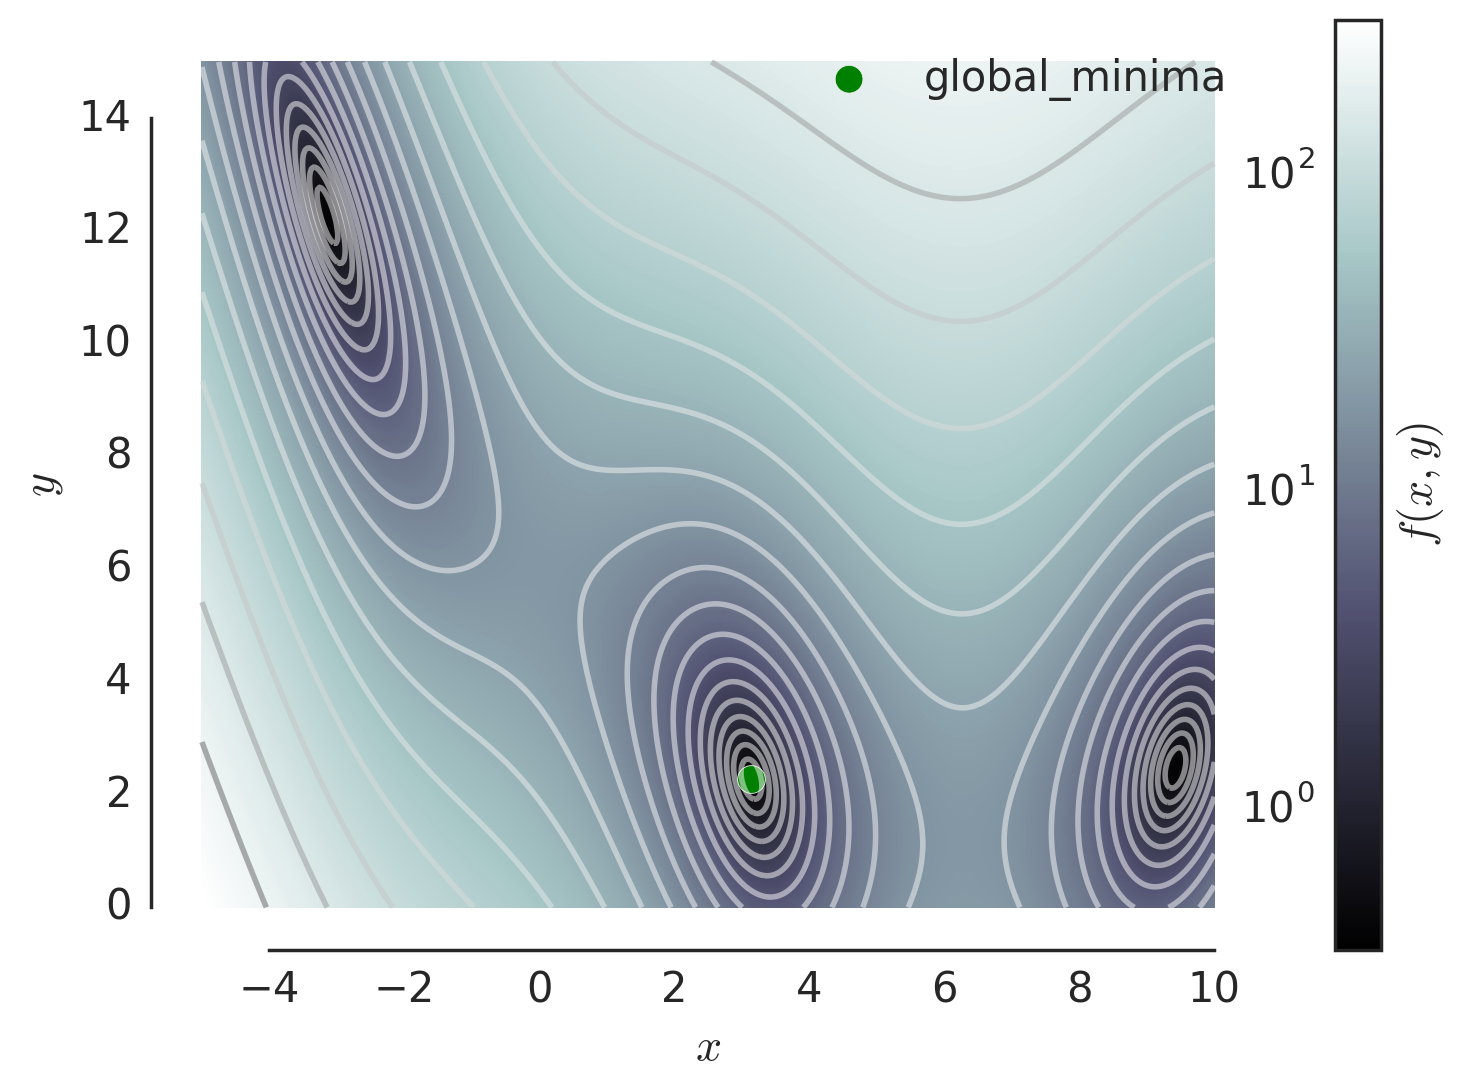

In [58]:
x = np.linspace(-5, 10, 500 )
y = np.linspace(0, 15, 500 )
Z = np.zeros((x.shape[0],y.shape[0]))
X, Y = np.meshgrid(x, y)
Z = np.array([[ branin(xx,yy) for yy in y] for xx in x])
        
plt.figure(figsize=(8,6))
plt.pcolor(X,Y,Z.T,
           norm=LogNorm(vmin=np.min(Z)*0.9,vmax=np.max(Z)),cmap='bone')
plt.colorbar(label='$f(x,y)$')
levels = np.logspace(np.log10(np.min(Z)*0.9), np.log10(np.max(Z)), 20)
plt.contour(Z.T, levels,linewidths=2,alpha=0.5,extent=(-5,10,0,15))
plt.scatter(min_x,min_y,s=100,c='g',label='global_minima')
# style
plt.legend(loc='best')
plt.xlabel('$x$')
plt.ylabel('$y$')
sns.despine(trim=True)
plt.show()

# Compare minimization

In [75]:
from scipy.optimize import minimize
guess = (np.mean(x),np.mean(y))
methods = {'BFGS':[],'CG':[],'Nelder-Mead':[]}

def info(x):
    pos.append(x)

branin_vector = lambda x: branin(x[0],x[1])
for key,val in methods.items():
    pos =[]
    print('== %s ==='%key)
    res = minimize( branin_vector, guess, jac=False,method=key,callback=info,options={'disp': True})
    methods[key]=np.array(pos)
    print("success? %s "%(res['success']))
    if res['success']:
        print("Global minima %f at %s "%(min_z,str(locmin_z)))
        print("Found minima %f at %s "%(branin(res['x'][0],res['x'][1]),str(res['x'])))

== Nelder-Mead ===
Optimization terminated successfully.
         Current function value: 0.397887
         Iterations: 41
         Function evaluations: 80
success? True 
Global minima 0.397887 at [3.14159213, 2.27500065] 
Found minima 0.397887 at [ 3.14157157  2.27501556] 
== BFGS ===
Optimization terminated successfully.
         Current function value: 0.397887
         Iterations: 7
         Function evaluations: 40
         Gradient evaluations: 10
success? True 
Global minima 0.397887 at [3.14159213, 2.27500065] 
Found minima 0.397887 at [ 3.14159213  2.27500063] 
== CG ===
         Current function value: 0.397891
         Iterations: 6
         Function evaluations: 56
         Gradient evaluations: 11
success? False 


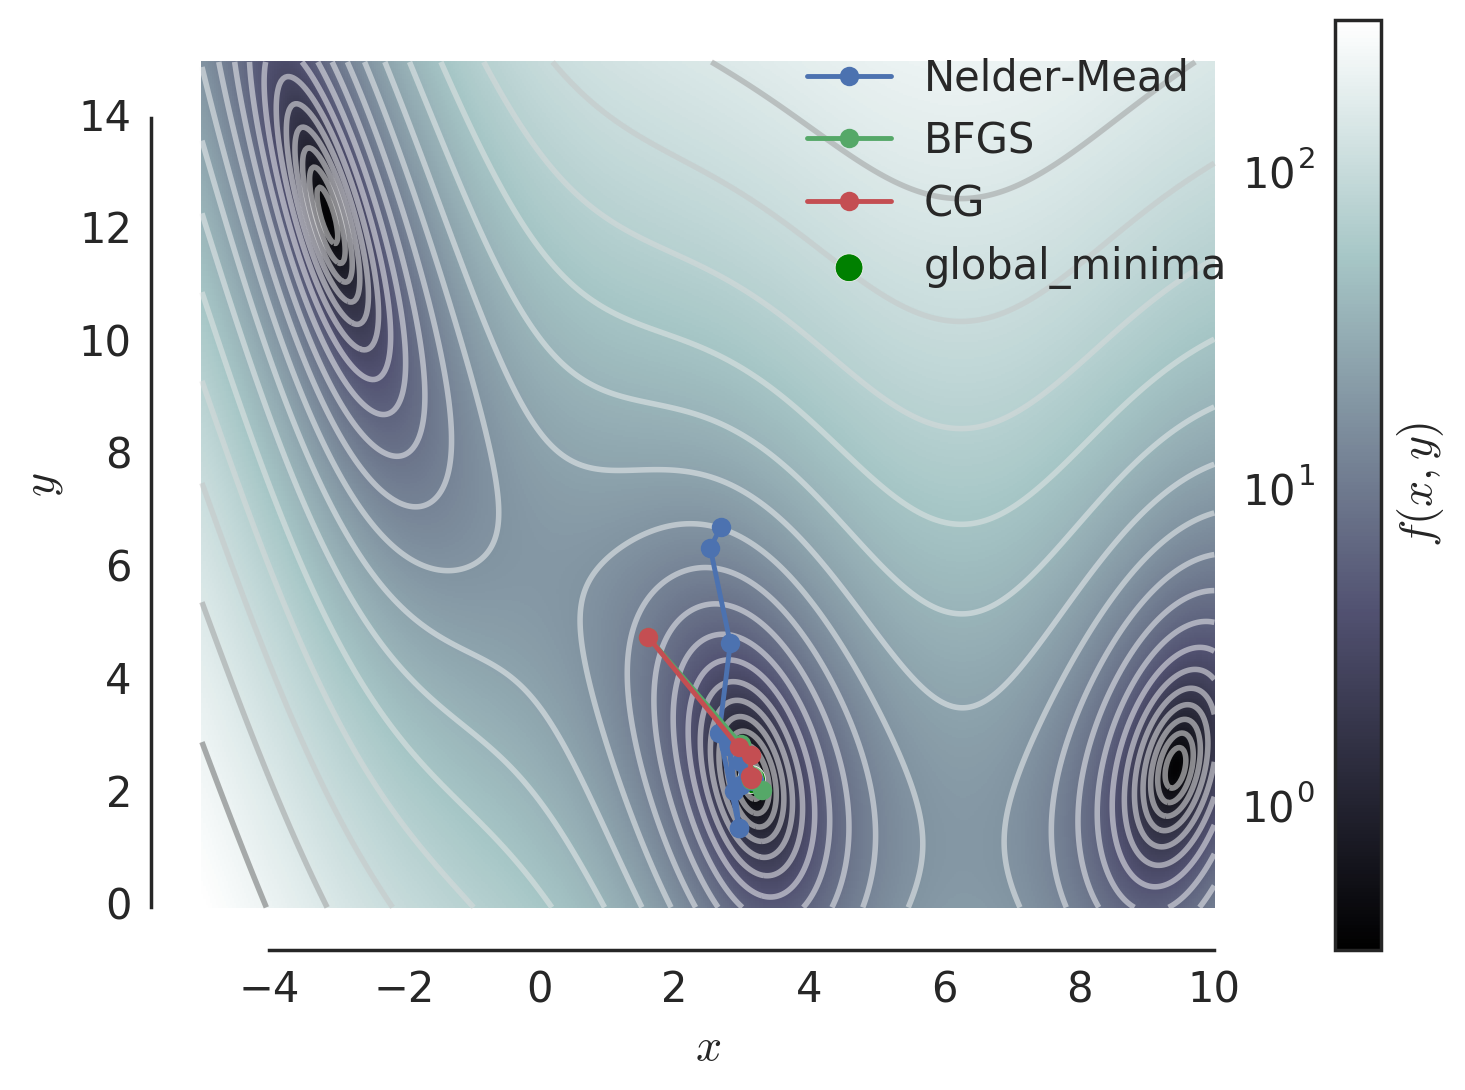

In [76]:
plt.figure(figsize=(8,6))
plt.pcolor(X,Y,Z.T,
           norm=LogNorm(vmin=np.min(Z)*0.9,vmax=np.max(Z)),cmap='bone')
plt.colorbar(label='$f(x,y)$')
levels = np.logspace(np.log10(np.min(Z)*0.9), np.log10(np.max(Z)), 20)
plt.contour(Z.T, levels,linewidths=2,alpha=0.5,extent=(-5,10,0,15))
plt.scatter(min_x,min_y,s=100,c='g',label='global_minima')
for key,val in methods.items():
    plt.plot(val[:,0],val[:,1],'-o',label=key)
    #plt.scatter(val['x'][0],val['x'][1],s=500,c='r',label='Grid')
# style
plt.legend(loc='best')
plt.xlabel('$x$')
plt.ylabel('$y$')
sns.despine(trim=True)
plt.show()

# Read database

## start mongodb

In [77]:
!mongod --fork --logpath test_py2/db/mongodb.log --dbpath test_py2/db

about to fork child process, waiting until server is ready for connections.
forked process: 148
ERROR: child process failed, exited with error number 48


## start mongo client

In [78]:
from pymongo import MongoClient
client = MongoClient()
print("Avail DB's: {}".format(client.database_names()))
db = client['spearmint']
print('DB fields: {}'.format(db.collection_names()))
coll= db['simple-braninhoo-example.jobs']

Avail DB's: [u'local', u'simple-braninhoo-example', u'spearmint']
DB fields: [u'simple-braninhoo-example.jobs', u'simple-braninhoo-example.recommendations', u'simple-braninhoo-example.hypers']


## put data into dataframe

In [83]:
import zlib
def decompress(values):
    val = np.fromstring(zlib.decompress(values['value'].decode('base64'))).reshape(values['shape'])
    if values['shape'] == [1]:
        val = val[0]
    return val

rows = []
for rec in coll.find():
    delta_t = rec['end time']-rec['start time']
    a_dict={'id':rec['id'],'objective':rec['values']['Objective'],'time':delta_t}
    for key,val in rec['params'].items():
        a_dict.update({key:decompress(val['values'])})
    rows.append(a_dict)
df = pd.DataFrame(rows)    
print(df.shape)
df.head()

(66, 5)


,id,objective,time,x,y
0,1,14.711279,0.001352,9.597626,6.389008
1,2,26.680522,0.001381,-4.990035,13.410486
2,3,16.901297,0.001250,4.793785,3.813145
3,4,141.133644,0.001311,9.952873,14.764435
4,5,252.608179,0.001255,-4.616085,0.493928
